In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.api as statsmodels
from statsmodels.formula.api import ols

In [4]:
from scipy.stats import f_oneway #ANOVA

In [5]:
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [10]:
from sklearn.metrics import mean_squared_error as MSE

In [11]:
import warnings
warnings.filterwarnings('ignore')

#1. Linear Regression<br>
###Examining the competition among fairy tale heroes, we collected the following data from a sample of 50 elements: the strength of the heroes [Erő], their combat ability [Küzdőképesség], and their popularity among fans [Gumimaci pontszám], which are contained in the bead52.1.csv file.
###We aim to develop a linear regression model where the outcome variable is the strength of the fairy tale heroes, while the explanatory variables are combat ability and the gummy bear score.

In [12]:
df1 = pd.read_csv('/content/bead52.1.csv')
print(df1.info())
print(df1.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sorszám            50 non-null     int64  
 1   Erő                50 non-null     int64  
 2   Küzdőképesség      50 non-null     int64  
 3   Gumimaci pontszám  50 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.7 KB
None
   Sorszám  Erő  Küzdőképesség  Gumimaci pontszám
0        1   95             87                8.1
1        2   78             85                8.3
2        3   83             88                8.0
3        4   91             86                8.1
4        5   89             84                7.9


In [13]:
df1 = df1.drop(columns=['Sorszám'], axis=1)
df1[['Erő', 'Küzdőképesség']] = df1[['Erő', 'Küzdőképesség']].astype('float64') #legyen minden float64, abból baj nem lehet...
print(df1.head(5))

    Erő  Küzdőképesség  Gumimaci pontszám
0  95.0           87.0                8.1
1  78.0           85.0                8.3
2  83.0           88.0                8.0
3  91.0           86.0                8.1
4  89.0           84.0                7.9


###Descriptive Statistics

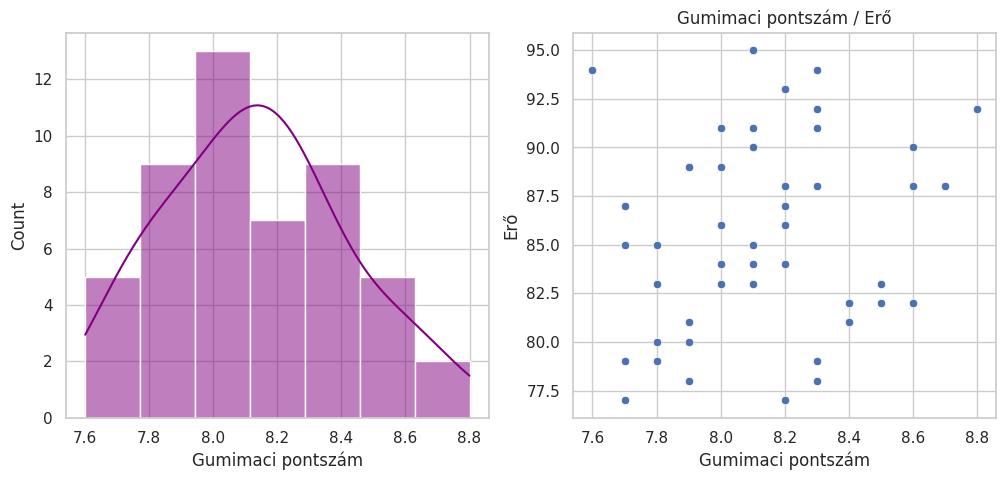

Standard deviation of 'Gumimaci pontszám': 0.2838798251056965


In [17]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df1['Gumimaci pontszám'], kde=True, color='purple', ax=axes[0])

sns.scatterplot(x='Gumimaci pontszám', y='Erő', data=df1, ax=axes[1])
plt.title('Gumimaci pontszám / Erő')
plt.xlabel('Gumimaci pontszám')
plt.ylabel('Erő')

plt.show()

std_dev_gumimaci = df1['Gumimaci pontszám'].std()
print("Standard deviation of 'Gumimaci pontszám':", std_dev_gumimaci)


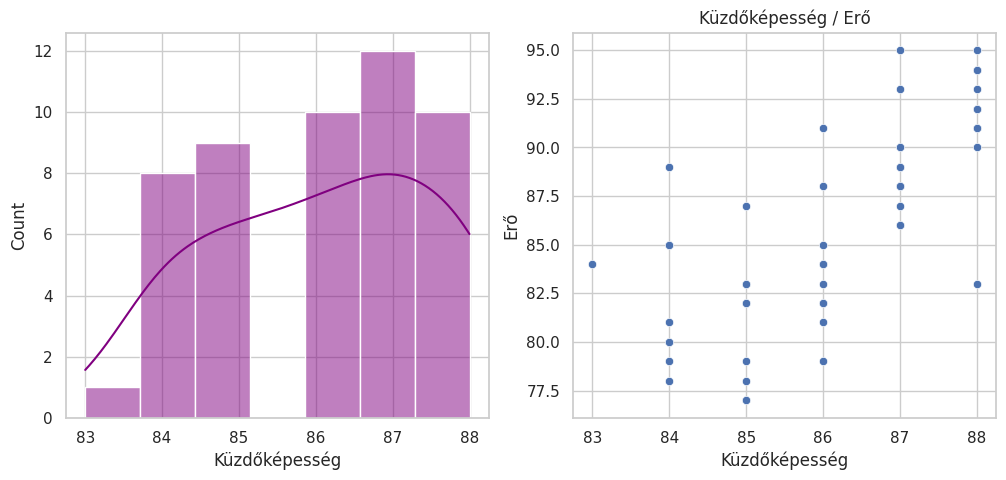

Standard deviation of 'Küzdőképesség': 1.4405214475377748


In [18]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df1['Küzdőképesség'], kde=True, color='purple', ax=axes[0])

sns.scatterplot(x='Küzdőképesség', y='Erő', data=df1, ax=axes[1])
plt.title('Küzdőképesség / Erő')
plt.xlabel('Küzdőképesség')
plt.ylabel('Erő')

plt.show()

std_dev_gumimaci = df1['Küzdőképesség'].std()
print("Standard deviation of 'Küzdőképesség':", std_dev_gumimaci)

"At a glance," combat ability [Küzdőképesség] explains strength better than gummy bear score [Gumimaci pontszám].

In [19]:
descriptive_statistics = df1.describe()
print(descriptive_statistics)

             Erő  Küzdőképesség  Gumimaci pontszám
count  50.000000      50.000000           50.00000
mean   85.840000      86.080000            8.13200
std     5.152214       1.440521            0.28388
min    77.000000      83.000000            7.60000
25%    82.000000      85.000000            7.90000
50%    85.500000      86.000000            8.10000
75%    90.000000      87.000000            8.30000
max    95.000000      88.000000            8.80000


###1/1. Estimate and interpret the parameters of the linear regression, and test whether the explanatory variables are significant at the 5% significance level!

In [20]:
X = df1[['Küzdőképesség', 'Gumimaci pontszám']] #Explanatory Variables
y = df1['Erő'] #Target Variable

X = statsmodels.add_constant(X) #add β₀ constant to the model

model = statsmodels.OLS(y, X).fit() #Fitting

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Erő   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     25.22
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           3.63e-08
Time:                        20:57:43   Log-Likelihood:                -134.19
No. Observations:                  50   AIC:                             274.4
Df Residuals:                      47   BIC:                             280.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -135.4211     32.21

<b>β₀: -135.4211 <br>
β₁: 2.5757 (Küzdőképesség) <br>
β₂: -0.0557 (Gumimaci pontszám) </b><br>
Erő = β₀ + β₁ × Küzdőképesség + β₂ × Gumimaci-pontszám + ε <br>
<br>
<b>Küzdőképesség P: 0.000 </b> – significant (P<0.05)<br>
<b>Gumimaci-pontszám P: 0.977</b> – not significant (P>0.05)<br>

###1/2. Determine and interpret the multiple determination coefficient (R-squared).

<b>Determination coefficient (R-squared): 0.518 </b><br>
Its range is 0-1, where a value close to 1 indicates that the model explains the variations in the dependent variable well. It can be misleading with a small sample size.<br><br>
<b>Adjusted determination coefficient (Adj R-squared): 0.497 </b><br> Its range is also 0-1, taking into account the number of explanatory variables, 'penalizing' outlier variables and measuring the goodness of fit more accurately.<br><br>
Both values are close to the middle range, which is much better than the expected grade I will get in this subject. (This assumption proved to be incorrect.)

###1/3. Test the reliability of the regression model at the 5% significance level<br>
<b>F-statistic: 25.22</b><br>
<b>Prob (F-statistic): 3.63e-08</b><br>
The result of the F-test is a p-value that shows whether all the explanatory variables in the model are jointly significant. If the p-value is less than the chosen significance level (in our case, 0.05), we can conclude that the explanatory variables of the model jointly significantly affect the dependent variable. Since 'p': 3.63e-08 < 0.05, we can consider the model reliable.

###1/4. Provide a confidence interval estimate for the parameters with 95% reliability!

In [21]:
conf_intervals = model.conf_int(0.95)  # 95%-os konfidenciaintervallumok

print(conf_intervals)

                            0           1
const             -137.452152 -133.390107
Küzdőképesség        2.552213    2.599138
Gumimaci pontszám   -0.174768    0.063347


###1/5. Make a prediction for the next fairy tale hero's value if the combat ability is 85 points and the gummy bear score is 8.5. Also, provide a 95% confidence interval estimate for this prediction.


In [22]:
X_pred = pd.DataFrame({'const': [1.0], 'Küzdőképesség': [85], 'Gumimaci pontszám': [8.5]}).astype('float64') #const: β₀ (intercept)

predicted_value = model.predict(X_pred)

prediction_intervals = model.get_prediction(X_pred).conf_int(0.95)

print("Predicted Value:", predicted_value[0])
print("Confidence Interval:", prediction_intervals[0,0], "-", prediction_intervals[0,1])


Predicted Value: 83.03776876536394
Confidence Interval: 75.40658029972498 - 90.66895723100289


#2. ANOVA<br>
###The bead52.2.csv file contains some gummy bear scores for fairy tale heroes of different categories [Szuperhősök, Anti-hősök, Mellékszereplők, Főgonoszok]. Is it acceptable to assume that the differences in gummy bear scores between fairy tale heroes of different categories are negligible or 0, or can a significant difference be detected at the ε = 0.05 significance level?

In [24]:
df2 = pd.read_csv('//content/bead52.2.csv')
print(df2.info())
print(df2.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Szuperhősök      48 non-null     float64
 1   Anti-hősök       48 non-null     float64
 2   Mellékszereplők  48 non-null     float64
 3   Főgonoszok       48 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB
None
   Szuperhősök  Anti-hősök  Mellékszereplők  Főgonoszok
0          8.1         8.3              8.0         8.0
1          7.9         8.1              7.8         8.1
2          8.0         8.2              7.7         7.9
3          8.2         8.0              7.9         8.2
4          8.3         8.4              7.8         8.0


###Descriptive Statistics

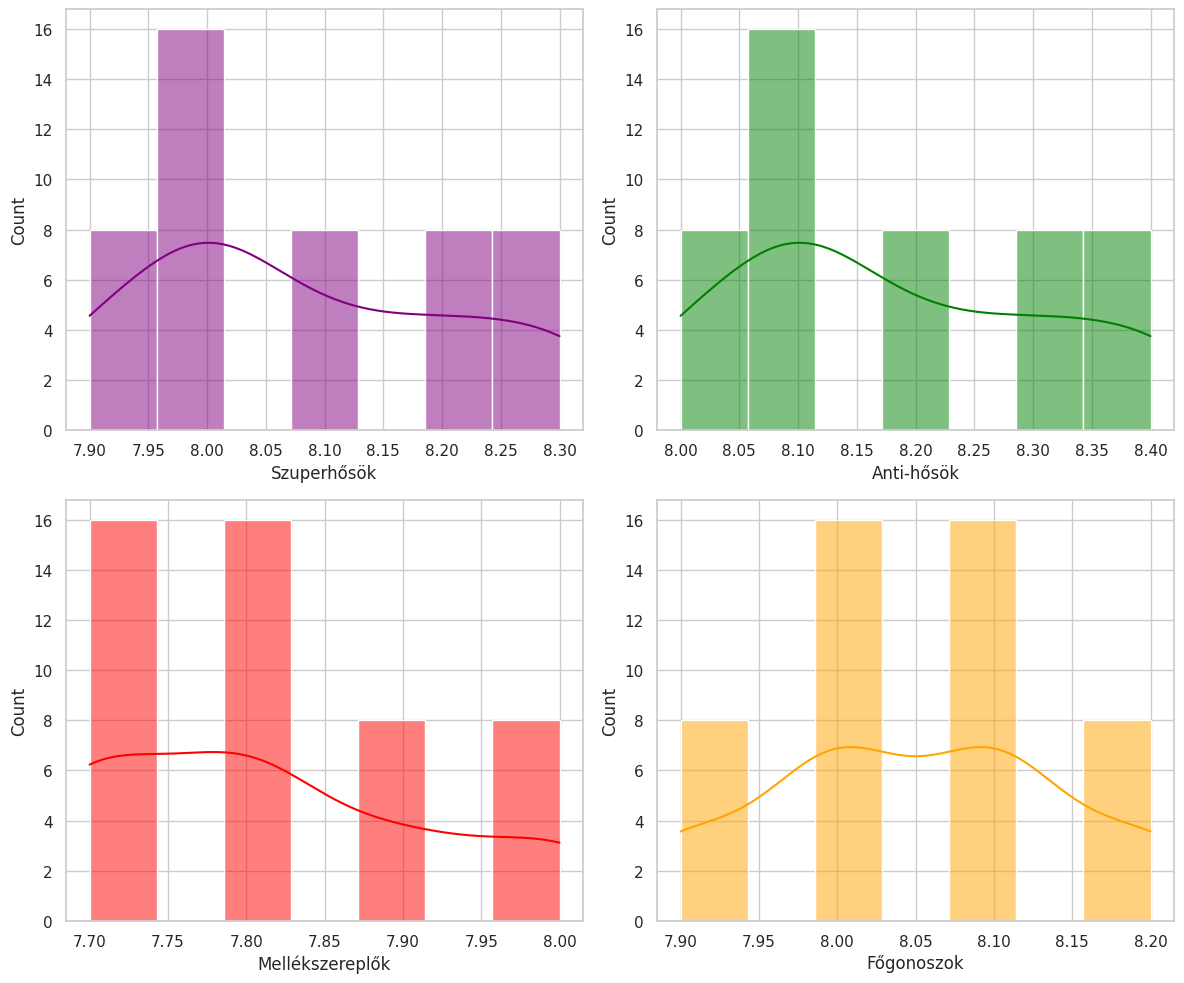

In [25]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.histplot(df2['Szuperhősök'], ax=axes[0,0], kde=True, color='purple')

sns.histplot(df2['Anti-hősök'], ax=axes[0,1], kde=True, color='green')

sns.histplot(df2['Mellékszereplők'], ax=axes[1,0], kde=True, color='red')

sns.histplot(df2['Főgonoszok'], ax=axes[1,1], kde=True, color='orange')

plt.tight_layout()

plt.show()


In [26]:
descriptive_statistics = df2.describe()
print(descriptive_statistics)

       Szuperhősök  Anti-hősök  Mellékszereplők  Főgonoszok
count    48.000000   48.000000        48.000000   48.000000
mean      8.083333    8.183333         7.816667    8.050000
std       0.135793    0.135793         0.107848    0.096756
min       7.900000    8.000000         7.700000    7.900000
25%       8.000000    8.100000         7.700000    8.000000
50%       8.050000    8.150000         7.800000    8.050000
75%       8.200000    8.300000         7.900000    8.100000
max       8.300000    8.400000         8.000000    8.200000


The descriptive statistics suggest homogeneity within the categories, but the distributions show differences.
<b>ANOVA</b> (Analysis of Variance) will be used to answer the questions.

###Formulation of Hypotheses:
<b>Null Hypothesis (H0):</b> There is no significant difference between the means of the categories. <br>
<b>Alternative Hypothesis (H1):</b> There is a significant difference between the means of at least two categories.<br>

I will also perform the analysis of variance between 'Superheroes' and 'Anti-heroes' with equal variance (σ) and similar other statistics for orientation:

In [27]:
f_statistic, p_value = f_oneway(df2['Szuperhősök'], df2['Anti-hősök']) # ANOVA variancia analízis

print('f statistic:' , f_statistic)
print('p value:' , p_value)

f statistic: 13.015384615384576
p value: 0.0004973031798802678


###ANOVA for the Four Categories


In [28]:
f_statistic, p_value = f_oneway(df2['Szuperhősök'], df2['Anti-hősök'], df2['Mellékszereplők'], df2['Főgonoszok']) # ANOVA variancia analízis

print('f statistic:' , f_statistic)
print('p value:' , p_value)

f statistic: 79.86928104575158
p value: 2.340459939485727e-33


<b>The high F-value</b> (79.8692) indicates that the variance between the groups is significantly larger than the variance within the groups; at least one group differs significantly from the others.

<b>The P-value is much smaller than the chosen significance level</b> (2.3404e-33 < 0.05), so we reject the null hypothesis; there is a significant difference between the means of the categories.<br>

ANOVA alone does not specify which group or groups show the difference.

#3. Time Series - ARIMA<br>
###The bead52.3.csv file shows the gummy bear scores of an imaginary "fairy tale hero" by years and months.

In [29]:
df3 = pd.read_csv('/content/bead52.3.csv', parse_dates=['Év-hónap'], index_col=['Év-hónap'])
df3.info()
df3.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-01-01 to 2016-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gumimaci pontszám  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


,Gumimaci pontszám
Év-hónap,
2016-08-01,7.4
2016-09-01,7.3
2016-10-01,7.6
2016-11-01,7.8
2016-12-01,7.9


###3/1. Create a time series plot based on the data, then calculate the empirical autocorrelation and partial autocorrelation functions.

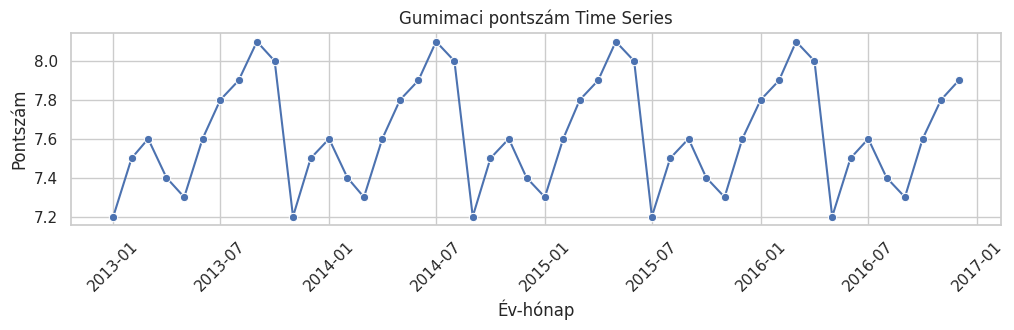

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 2.5))
sns.lineplot(x='Év-hónap', y='Gumimaci pontszám', data=df3, marker='o')

plt.title('Gumimaci pontszám Time Series')
plt.xlabel('Év-hónap')
plt.ylabel('Pontszám')
plt.xticks(rotation=45)

plt.show()


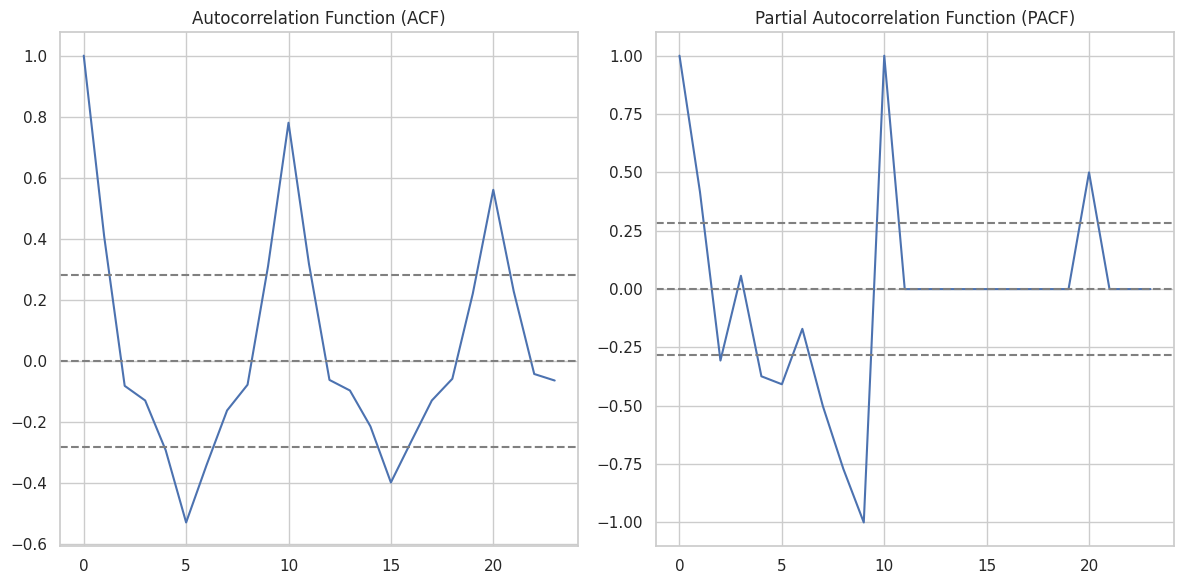

In [33]:
lag_acf = acf(df3['Gumimaci pontszám'], nlags=23) # ACF calculation
lag_pacf = pacf(df3['Gumimaci pontszám'], nlags=23, method='ols') # PACF calculation | nlag max < n/2

# ACF diagram
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df3['Gumimaci pontszám'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df3['Gumimaci pontszám'])), linestyle='--', color='gray')
plt.title('Autocorrelation Function (ACF)')

# PACF diagram
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df3['Gumimaci pontszám'])), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df3['Gumimaci pontszám'])), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


###3/2. By experimenting with the transformation of the data and filtering out the trend and seasonal components, you can fit different time series models. Test the fit.

In [34]:
ts = df3['Gumimaci pontszám'].resample('MS').sum()

In [35]:
ts.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 48 entries, 2013-01-01 to 2016-12-01
Freq: MS
Series name: Gumimaci pontszám
Non-Null Count  Dtype  
--------------  -----  
48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [36]:
ts.head()

Év-hónap
2013-01-01    7.2
2013-02-01    7.5
2013-03-01    7.6
2013-04-01    7.4
2013-05-01    7.3
Freq: MS, Name: Gumimaci pontszám, dtype: float64

###Decomposition



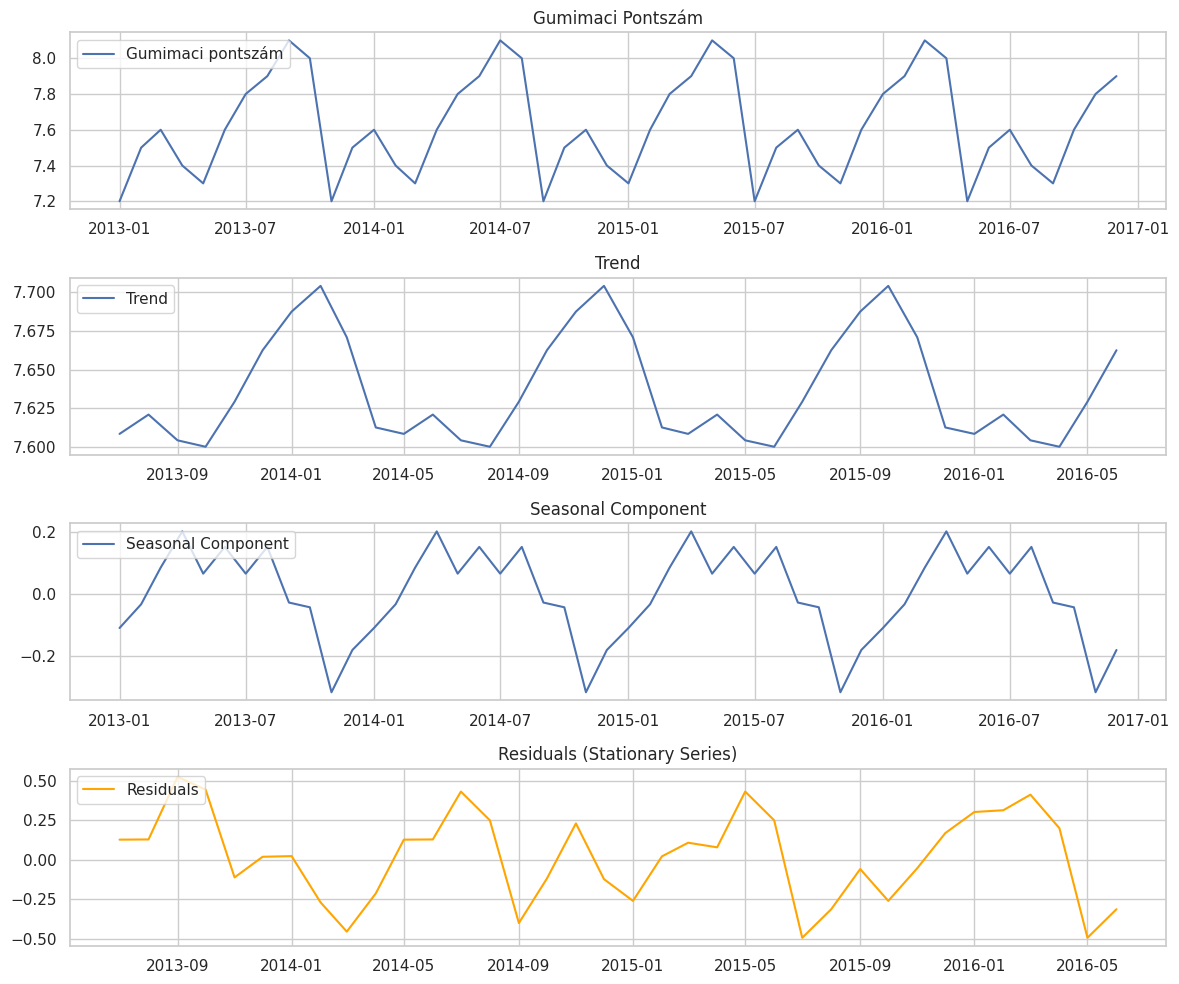

In [39]:
decomposition = seasonal_decompose(ts, model='additive')
# Dekompozíció elemeinek kinyerése
trend_log = decomposition.trend
seasonal_log = decomposition.seasonal
residual_log = decomposition.resid

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(df3['Gumimaci pontszám'], label='Gumimaci pontszám')
plt.title('Gumimaci Pontszám')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend_log, label='Trend')
plt.title('Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal_log, label='Seasonal Component')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual_log, label='Residuals', color='orange')
plt.title('Residuals (Stationary Series)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [41]:
adftest = adfuller(ts)

In [42]:
print('Adfuller p-value:', adftest[1])

Adfuller p-value: 0.0


According to the Adfuller test, the original time series is stationary. <b>d=0

##ARIMA model


###Train/test split

In [46]:
len(ts)

48

In [47]:
train = ts[:36]
test = ts[36:]

###Estimation of ARIMA parameters

In [48]:
p = 10  # Estimation of the AR part (p) based on the PACF
d = 0  # Since the series is already stationary, the I part (d) is 0
q = 10  # Estimation of the MA part (q) based on the ACF

In [49]:
p, d, q

(10, 0, 10)

In [50]:
model = ARIMA(train, order=(p,d,q)).fit()

###Predict test

In [51]:
pred = model.predict(start=len(train), end=(len(ts)-1))

###Evaluation of the ARIMA model

In [53]:
error = np.sqrt(MSE(test, pred)) #Átlagos négyzetes hiba gyöke
print('Mean Squared Error (MSE):', error)
mean = test.mean() #Mean
print('Mean:', mean)
var = np.sqrt(test.var()) #Standard Deviation
print('Standard Deviation:', var)

Mean Squared Error (MSE): 0.0010877151833721486
Mean: 7.675
Standard Deviation: 0.2864357773488754


<Axes: xlabel='Év-hónap'>

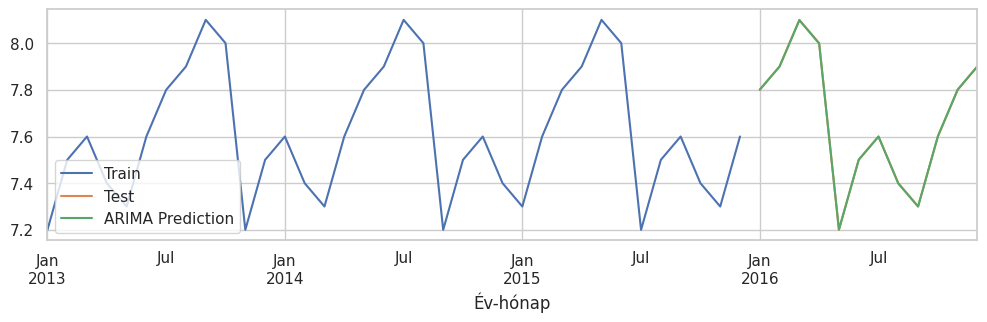

In [54]:
train.plot(legend=True, label='Train', figsize=(12,3))
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='ARIMA Prediction')

In [55]:
results_ARIMA = model.summary()

print(results_ARIMA)

                               SARIMAX Results                                
Dep. Variable:      Gumimaci pontszám   No. Observations:                   36
Model:               ARIMA(10, 0, 10)   Log Likelihood                 123.266
Date:                Sat, 06 Jul 2024   AIC                           -202.532
Time:                        21:18:08   BIC                           -167.695
Sample:                    01-01-2013   HQIC                          -190.373
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6400      0.001   1.14e+04      0.000       7.639       7.641
ar.L1         -0.0296      1.864     -0.016      0.987      -3.683       3.624
ar.L2         -0.0340      1.919     -0.018      0.9

##3/3. Make a forecast for the expected gummy bear scores for the next months.

###ARIMA Prediction for 6 months

<Axes: xlabel='Év-hónap'>

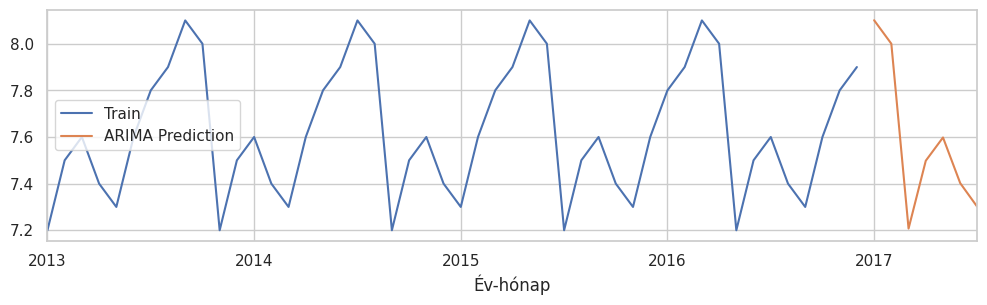

In [57]:
p = 10
d = 0
q = 4

pred_model=ARIMA(ts, order=(p,d,q)).fit() #Train on the whole time series data

prediction=pred_model.predict(len(ts), len(ts)+6)

ts.plot(legend=True, label='Train', figsize=(12,3))
prediction.plot(legend=True, label='ARIMA Prediction')

In [58]:
results_ARIMA = pred_model.summary()

print(results_ARIMA)

                               SARIMAX Results                                
Dep. Variable:      Gumimaci pontszám   No. Observations:                   48
Model:                ARIMA(10, 0, 4)   Log Likelihood                 117.464
Date:                Sat, 06 Jul 2024   AIC                           -202.927
Time:                        21:20:14   BIC                           -172.988
Sample:                    01-01-2013   HQIC                          -191.613
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6409      0.032    241.101      0.000       7.579       7.703
ar.L1          0.0002      0.423      0.000      1.000      -0.829       0.830
ar.L2         -0.0041      0.333     -0.012      0.9